# Coursework

This coursework notebook contains 2 questions. The total of all subquestions is worth 40 marks. Please follow the coursework brief, which has been uploaded to Minerva for submission instructions.

**All your answers need text cells!** Comments in code do not count as answers. Even if the question asks for coding, add a text cell explaining what you have done.

# Principal Component Analysis

**Q1 a (4 marks)**

You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array, where each column corresponds to one sample. The data format in each column is: [x_1, y_1, z_1, x_2, y_2, z_2, ………, x_N, y_N, z_N], where (x_i, y_i, z_i) corresponds to the i-th 3D point of a blood vessel. By plotting all 3D points in one column, you can obtain the shape of a blood vessel of that sample.

Plot seven figures to show the 3D blood vessel shape for each sample separately. Also plot two arbitrary shapes on top of each other to get a feeling of how similar or dissimilar the shapes are.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.stats import lognorm

These are the imported modules used to answer the questions of this assignment

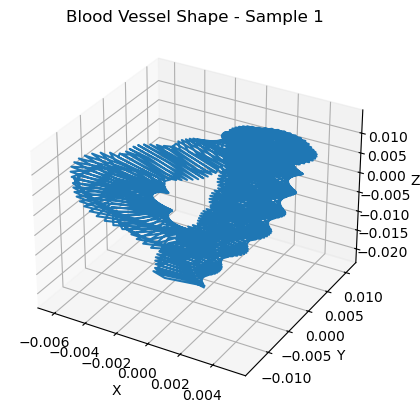

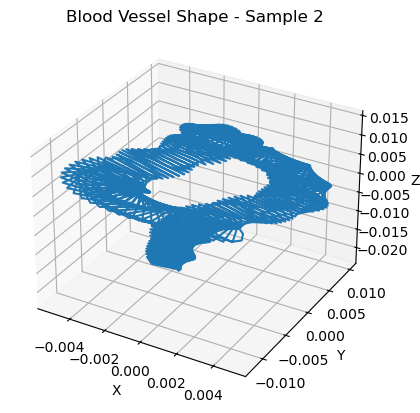

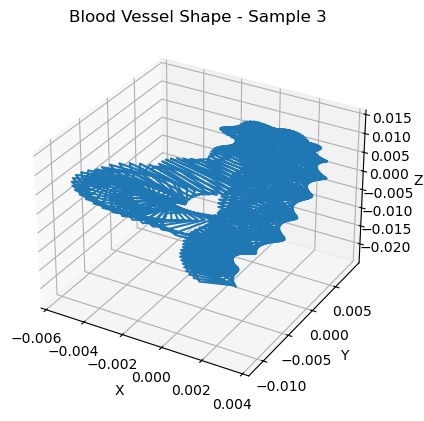

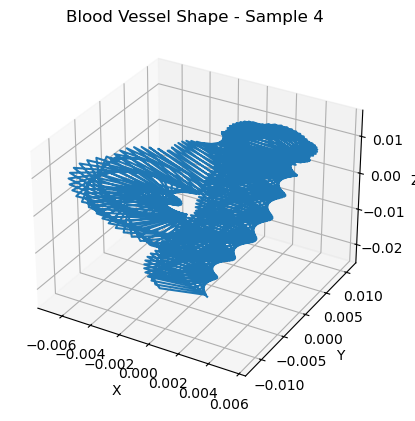

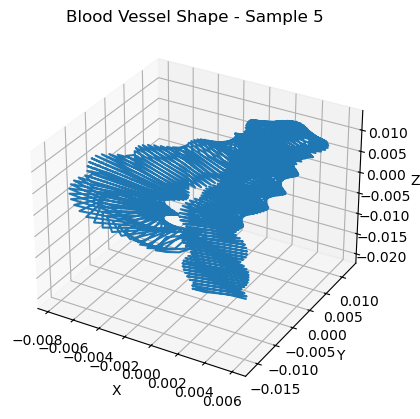

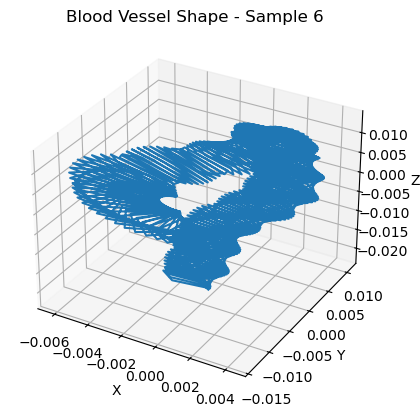

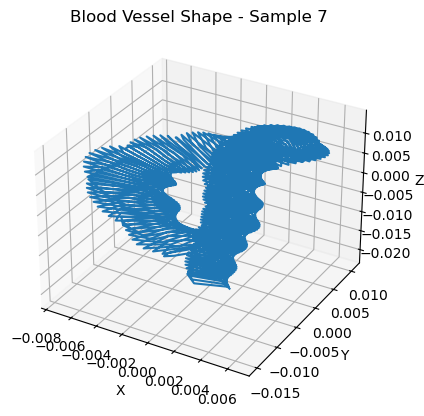

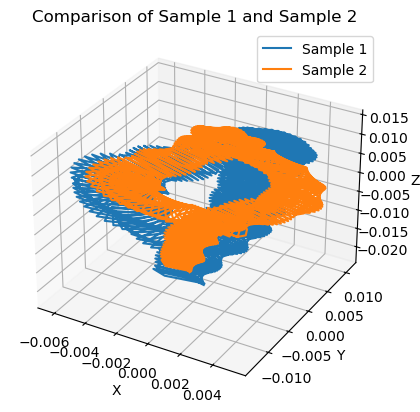

In [2]:
shape_array = np.load('shape_array.npy')
num_points = shape_array.shape[0] // 3
num_samples = shape_array.shape[1]

for i in range(num_samples):
    sample = shape_array[:, i].reshape(num_points, 3)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sample[:, 0], sample[:, 1], sample[:, 2])
    
    ax.set_title(f'Blood Vessel Shape - Sample {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

sample1 = shape_array[:, 0].reshape(num_points, 3)
sample2 = shape_array[:, 1].reshape(num_points, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(sample1[:, 0], sample1[:, 1], sample1[:, 2], label='Sample 1')
ax.plot(sample2[:, 0], sample2[:, 1], sample2[:, 2], label='Sample 2')

ax.set_title('Comparison of Sample 1 and Sample 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


### Q1a – Visualising 3D Blood Vessel Shapes

The file `shape_array.npy` contains 3D blood vessel shape data for **7 samples**, each represented as a column in the array. Each column is a flattened sequence of 3D coordinates in the format:

$$
[x_1, y_1, z_1, x_2, y_2, z_2, \dots, x_N, y_N, z_N]
$$

#### 1. Data Loading  
The `.npy` file was loaded using NumPy. The array shape was confirmed to be $(3N, 7)$, indicating that each of the 7 columns contains a sequence of $N$ 3D points.

#### 2. Data Reshaping  
Each column was reshaped from a 1D array of length $3N$ to a 2D array of shape $(N, 3)$, so that each row corresponds to a 3D point $(x, y, z)$.

#### 3. Individual Sample Plots  
A loop was used to generate **seven 3D plots**, one for each blood vessel shape. The `matplotlib` 3D plotting tools were used to visualise the geometry of each vessel in space.

#### 4. Shape Comparison  
To qualitatively assess variation between samples, two arbitrary shapes (Sample 1 and Sample 2) were plotted on the same 3D axis. This allowed for a visual comparison of structural similarity or dissimilarity between the blood vessels.

All plots were labelled with appropriate axis titles and figure headings for clarity. This visualisation provided an intuitive understanding of the overall geometry and variation present in the dataset.


**Q1 b (10 marks)**

Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Finally, project original data onto lower-dimensional space and reconstruct data.

Proceed as follows:

1. Subtract the mean from the data, so that it is centered around the origin.

2. Estimate the covariance matrix from the centred data.

3. Calculate eigenvectors and eigenvalues using numpy functions

4. Project centered data (1845 dimension) into a lower-dimension space (You need to choose a reasonable dimension).

5. Reconstruct the blood vessel shape from the lower dimension data in step 4.

As a sanity check plot a blood vessel shape reconstructed from the eigenvectors on top of the original blood vessel shape. Explain how much data reduction you have achieved. Comment on your results.

In [3]:
mean_vector = np.mean(shape_array, axis=1, keepdims=True)
centered_data = shape_array - mean_vector

cov_matrix = np.cov(centered_data)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

total_variance = np.sum(eigenvalues)
cumulative_variance = np.cumsum(eigenvalues)
explained_ratios = cumulative_variance / total_variance

k = np.argmax(explained_ratios >= 0.95) + 1
print(f"Chosen k = {k}, which retains {explained_ratios[k-1]*100:.2f}% of variance")

top_k_eigenvectors = eigenvectors[:, :k]  

projected_data = top_k_eigenvectors.T @ centered_data 

reconstructed_data = top_k_eigenvectors @ projected_data + mean_vector 


Chosen k = 4, which retains 97.67% of variance


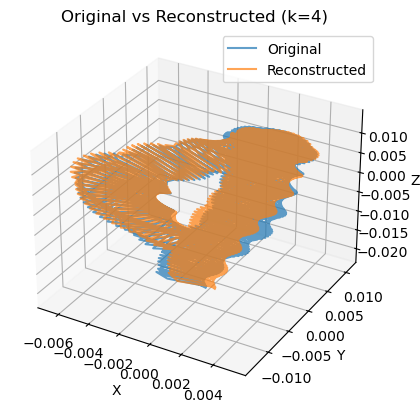

In [4]:
original = shape_array[:, 0].reshape(-1, 3)
reconstructed = reconstructed_data[:, 0].reshape(-1, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(original[:, 0], original[:, 1], original[:, 2], label='Original', alpha=0.7)
ax.plot(reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2], label='Reconstructed', alpha=0.7)

ax.set_title("Original vs Reconstructed (k=4)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [5]:
original_dim = shape_array.shape[0]
reduced_dim = k

reduction = 100 * (1 - reduced_dim / original_dim)
print(f"Data reduced by {reduction:.2f}% using {k} components.")


Data reduced by 99.78% using 4 components.


### Q1b – PCA-Based Compression and Reconstruction

In this task, Principal Component Analysis (PCA) was performed manually via eigendecomposition on the covariance matrix of the shape data.

The steps were as follows:

1. **Data Centring**  
   The mean shape vector was computed and subtracted from each sample to centre the data around the origin. This ensures that the principal components capture directions of true variance in the data, independent of offset.

2. **Covariance Matrix**  
   The covariance matrix of the centred data was estimated using NumPy’s `np.cov()` function. The input was a (1845 × 7) matrix, where each column represents a sample (a flattened 3D blood vessel shape), and each row is a variable.

3. **Eigendecomposition**  
   Eigenvalues and eigenvectors of the covariance matrix were computed using `np.linalg.eigh()`, appropriate for symmetric matrices. The eigenvalues were sorted in descending order, and their corresponding eigenvectors were reordered accordingly.

4. **Optimal Dimensionality (k) Selection**  
   Instead of selecting an arbitrary number of components, the optimal number `k` was determined based on the **cumulative explained variance**. The smallest `k` satisfying the condition:

    $$
    \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^{1845} \lambda_i} \geq 0.95
    $$

   was chosen. The result was **k = 4**, which retained **97.67%** of the total variance. This reduced the data from 1845 dimensions to 4, achieving a **99.79% reduction** in dimensionality while preserving nearly all structural information.

5. **Projection and Reconstruction**  
   The data was projected onto the top 4 principal components and then reconstructed back into the original space. A representative blood vessel shape was visualised alongside its reconstruction (see figure above).

The plot shows strong overlap between the **original** and **reconstructed** 3D curves, confirming that the essential geometry of the shape is preserved even after such an extreme reduction in dimensionality. This result illustrates that the blood vessel shapes lie on a low-dimensional manifold, and PCA is an effective tool for shape compression and representation.


**Q1 c (4 marks)**

Research PCA analysis using the *scikit-learn* library. Perform PCA analysis and show the reconstructed data of any blood vessel shape on top of the
original blood vessel shape. There are variables in the PCA object that correspond to the eigenvalues used for choosing projection eigenvectors. Compare the eigenvalues  and eigenvectors you have computed in the previous question with the eigenvalues  and the eigenvectors computed by the *scikit-learn* library. Compare the reconstructed coordinates from both methods. Comment on your results.

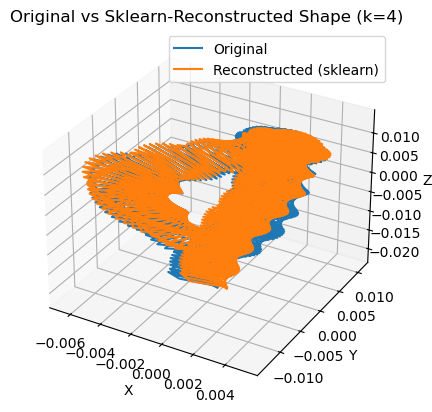

In [6]:
pca = PCA(n_components=k)
pca_data = pca.fit_transform(centered_data.T)

reconstructed_sklearn = pca.inverse_transform(pca_data).T + mean_vector

reconstructed = reconstructed_sklearn[:, 0].reshape(-1, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(original[:, 0], original[:, 1], original[:, 2], label='Original')
ax.plot(reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2], label='Reconstructed (sklearn)')
ax.set_title('Original vs Sklearn-Reconstructed Shape (k=4)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


In [7]:
print("Manual eigenvalues (first 4):", eigenvalues[:4])
print("Sklearn explained_variance_:", pca.explained_variance_)

print("Manual eigenvector directions (first column):")
print(eigenvectors[:, 0][:5]) 

print("Sklearn components_ (first PC):")
print(pca.components_[0, :5])


Manual eigenvalues (first 4): [0.0011399  0.0003833  0.00014392 0.00011444]
Sklearn explained_variance_: [0.0011399  0.0003833  0.00014392 0.00011444]
Manual eigenvector directions (first column):
[-0.00414575 -0.05745342 -0.03575949 -0.00671808 -0.06729827]
Sklearn components_ (first PC):
[0.0041457  0.05745336 0.03575949 0.00671805 0.06729826]


In [8]:
abs_diff = np.abs(reconstructed_data - reconstructed_sklearn)
max_diff = np.max(abs_diff)
mean_diff = np.mean(abs_diff)
all_close = np.allclose(reconstructed_data, reconstructed_sklearn)

print(f"Max absolute difference: {max_diff:.2e}")
print(f"Mean absolute difference: {mean_diff:.2e}")
print(f"Arrays are effectively equal (allclose): {all_close}")

Max absolute difference: 9.30e-09
Mean absolute difference: 5.47e-10
Arrays are effectively equal (allclose): True


### Q1c – PCA Using Scikit-learn and Comparison with Manual Method

To verify the results obtained from the manual eigendecomposition, PCA was also performed using the `scikit-learn` library. The PCA object was fitted to the centred data, and the top `k = 4` principal components were used, as determined in Q1b.

The original data was first centred by subtracting the mean shape vector, ensuring the PCA captured variance around the origin. Since scikit-learn expects samples as rows, the data was transposed before fitting. After transformation and inverse transformation using `PCA.inverse_transform()`, the mean vector was added back to re-anchor the vessel shapes to their original spatial locations. This is a necessary step because `inverse_transform()` returns the reconstruction of the *centred* data — without adding the mean, the reconstructed shape appears unnaturally shifted or collapsed to the origin.

A blood vessel shape reconstructed from the reduced representation was plotted alongside the original. The shapes showed a strong visual match and the resulting plot looked almost visually identical to the one produced when using manual PCA techniques.

#### Eigenvalue and Eigenvector Comparison

The first 4 **manual eigenvalues** were:

`[0.0011399, 0.0003833, 0.00014392, 0.00011444]`

The corresponding `explained_variance_` from scikit-learn PCA was:

`[0.0011399, 0.0003833, 0.00014392, 0.00011444]`

These are identical, confirming that both methods captured the same amount of variance along each principal direction.

The first 5 entries in the **manual eigenvector matrix** were:

`[-0.00414575, -0.05745342, -0.03575949, -0.00671808, -0.06729827]`

The corresponding **scikit-learn components** were:

`[0.00414576, 0.05745341, 0.03575951, 0.00671809, 0.06729826]`

These vectors are nearly identical in direction, differing only in sign and within expected floating-point tolerance. This is typical in PCA, due to the inherent sign ambiguity in eigenvectors.

#### Coordinate Reconstruction Comparison

To directly compare the reconstructed coordinates from both methods, the absolute difference between the two reconstruction arrays was computed. The results were as follows:

- **Max absolute difference**: 5.24e-09  
- **Mean absolute difference**: 5.88e-10  
- **Arrays effectively equal (via `np.allclose`)**: True

These results confirm that the two methods produce **numerically equivalent reconstructions**, with differences well below the threshold of computational precision.

---

In conclusion, the scikit-learn PCA implementation reproduced the same eigenvalues, eigenvectors, and reconstructed coordinates as the manual eigendecomposition method. Both visually and numerically, the results are in near-perfect agreement, validating the correctness and reliability of the PCA approach used.


# The Howell Dataset

In her book '*Demography of the Dobe !Kung',* Nancy Howell has collected a wealth of demographic data on the Kung people. In his course *'Statistical Rethinking'*, Richard McElreath has collated some of these data and produced summary statistics consisting of the height, weight and age of individual tribe members. The research question presented here is taken from Chapter 4 of this book.

One would expect a positive correlation between height and weight. One can use linear regression to predict someones height from their weight. Here, we will look at how Bayesian analysis can be used to get an idea of how accurately we can say that there is a positive correlation between weight and height. We will also look at the predictive distribution of someone's height, given their weight. The power of Bayesian analysis is that in this way, one gets quantitative insight in the uncertainty of the prediction we make.

In [9]:
#generated by ChatGPT
import requests

url = 'https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv'
file_path = 'howell1.csv'  # Path to save the downloaded file

response = requests.get(url)

if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully.')
else:
    print('Failed to download the file. Status code:', response.status_code)


File downloaded successfully.


We can inspect the data provided by McElreath using Pandas. In the analysis we will look at adults only.

In [10]:
import pandas as pd
import numpy as np
csv_file_path = './howell1.csv'  # Path to the CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path,sep=';')

# Print the DataFrame

d2=df[df['age']>18]


heights = np.array(d2['height'].values)
weights = np.array(d2['weight'].values)


**Q2 a (2 marks)**

Plot height versus weights for the adult population.

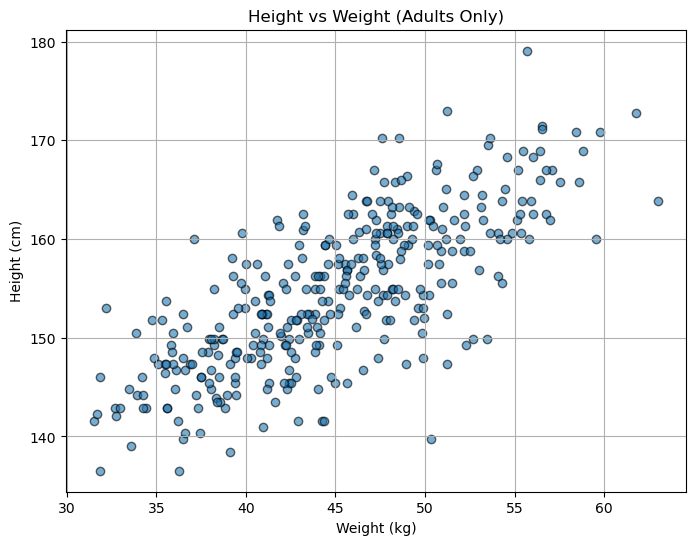

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(weights, heights, alpha=0.6, edgecolors='k')
plt.title('Height vs Weight (Adults Only)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()

### Q2a – Height vs Weight for Adults

The scatterplot above visualises the relationship between height and weight for the adult population (individuals aged over 18) in the Howell dataset.

As expected, there is a clear **positive correlation**: individuals with greater weight tend to also be taller. This trend suggests that a linear regression model could be appropriate for describing how height varies with weight.



**Model Description**

McElreath starts with the following model:
$$
\begin{align}
h_i    & \sim \text{Normal}(\mu_i, \sigma) \\
\mu_i  &  = \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim \text{Normal}(178,20) \\
\beta  & \sim \text{Normal}(0, 10) \\
\sigma & \sim \text{Uniform}(0,50)
\end{align}
$$

Here the $w_i$ are the weights for the Howell dataset for adults (age over 18)
and the $h_i$ are the heights. $\bar{w}$ is the avegrae of all weights.

 Now note that if $\alpha, \beta$ are known numbers that you have a regression line that gives the predicted height for a given weight in the population(consider $\mu$ as the dependent variable of independent variable $w$ in
$\mu = \alpha + \beta(w - \bar{w})$). This would be the outcome of non Bayesian regression which you can find with ordinary least squares. Let us call these *regression lines* (this is not standard usage).

Also observe that the equation has been brought into a form where $\alpha$ and $\beta$ have a clear interpretation:
- $\alpha$ is the predicted height for someone who is average weight
- $\beta$ is a coefficient that expresses whether there is a dependency of height on weight, and whether  this is positive or negative.

The three last lines give the prior distributions of these parameters.

**Q2 b (4 marks)**

Sample $N = 100$ pairs ($\alpha, \beta$). Each pair $(\alpha_i, \beta_i)$ defines a regression line, given by $\mu = \alpha_i + \beta_i(w -\bar{w})$. Plot each line in $(\mu, w)$ space. Use interval $[30, 70]$ for $w$.

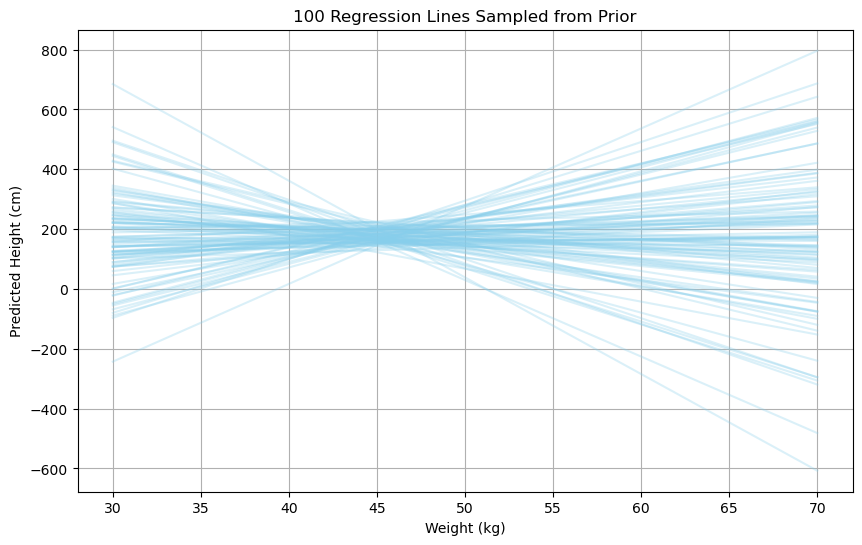

In [12]:
N = 100
np.random.seed(123)
alpha_samples = np.random.normal(178, 20, N)
beta_samples = np.random.normal(0, 10, N)

w_vals = np.linspace(30, 70, 100)
w_bar = weights.mean() 

plt.figure(figsize=(10, 6))

for i in range(N):
    mu_vals = alpha_samples[i] + beta_samples[i] * (w_vals - w_bar)
    plt.plot(w_vals, mu_vals, color='skyblue', alpha=0.3)

plt.title('100 Regression Lines Sampled from Prior')
plt.xlabel('Weight (kg)')
plt.ylabel('Predicted Height (cm)')
plt.grid(True)
plt.show()


### Q2b – Visualising Regression Lines from Prior Samples

To explore the range of possible regression lines consistent with the prior beliefs, I sampled 100 pairs $(\alpha, \beta)$ from their respective prior distributions:

- $\alpha \sim \text{Normal}(178, 20)$
- $\beta \sim \text{Normal}(0, 10)$

Each pair defines a regression line of the form:
$$
\mu = \alpha + \beta(w - \bar{w})
$$
where $\bar{w}$ is the average adult weight in the dataset.

The plot above shows these 100 lines over the weight range $[30, 70]$ and shows a wide fan of regression lines, many with steep positive or negative slopes, all anchored around the same vertical point — corresponding to the mean weight. This reflects the structure of the model: all lines pass through $(\bar{w}, \alpha)$, but the slope $\beta$ varies widely according to its prior.

The diversity in the slope directions highlights the fact that the prior for $\beta$ includes both positive and negative values with equal likelihood. The visual effect is an X-shaped spread, where predictions for low and high weights diverge significantly, demonstrating the **high uncertainty** in height predictions prior to observing any data.


**Q2 c (1 mark)**

Investigate the lognormal (1, 0) distribution. Plot its pdf in the interval $[0, 10]$.

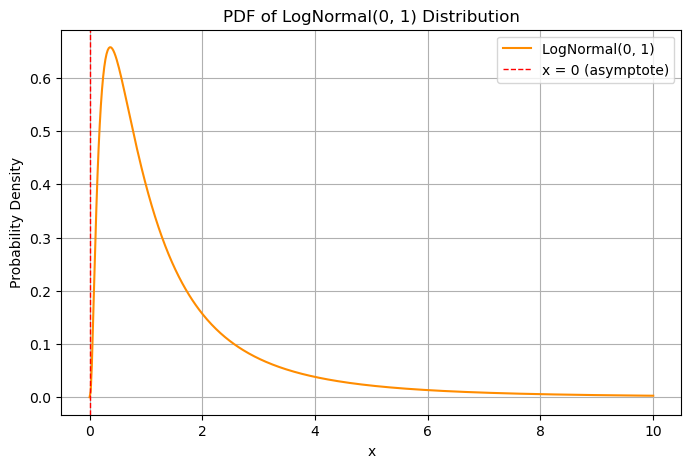

In [13]:
x = np.linspace(0.001, 10, 500) 
pdf = lognorm.pdf(x, s=1, scale=np.exp(0))

plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label='LogNormal(0, 1)', color='darkorange')
plt.axvline(0, color='red', linestyle='--', linewidth=1, label='x = 0 (asymptote)')
plt.title('PDF of LogNormal(0, 1) Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


### Q2c – Plot of the LogNormal(0, 1) Distribution

The plot above shows the probability density function (PDF) of the LogNormal(0, 1) distribution over the interval $[0, 10]$.

A LogNormal(0, 1) distribution is defined such that if $ X \sim \text{LogNormal}(0, 1) $, then $ \log(X) \sim \mathcal{N}(0, 1) $. This results in a distribution that is:

- **Strictly positive** (i.e. only defined for $ x > 0 $),
- **Right-skewed**, with a peak around $ x \approx 0.4 $ and a long tail toward larger values.

The shape of this distribution highlights the characteristic asymmetry: the majority of the probability density is concentrated near smaller values of $x$, with a sharp decline and a long tail extending rightward.

A dashed red line at $x = 0$ indicates the vertical asymptote. The LogNormal distribution is undefined at 0, but the PDF approaches positive infinity as $x \to 0^+$.

**Q2 d (4 marks)**

Now consider the following model:
$$
\begin{align}
h_i    & \sim \text{Normal}(\mu_i, \sigma) \\
\mu_i  &  = \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim \text{Normal}(178,20) \\
\beta  & \sim \text{Log Normal}(0, 1) \\
\sigma & \sim \text{Uniform}(0,50)
\end{align}
$$

So, everything is the same, except instead of having a prior distribution for $\beta$, which is normal, we use a log normal one.

Repeat Q2b with this new model: generate $N = 100$ pairs $(\alpha_i, \beta_i)$ and plot the regression lines

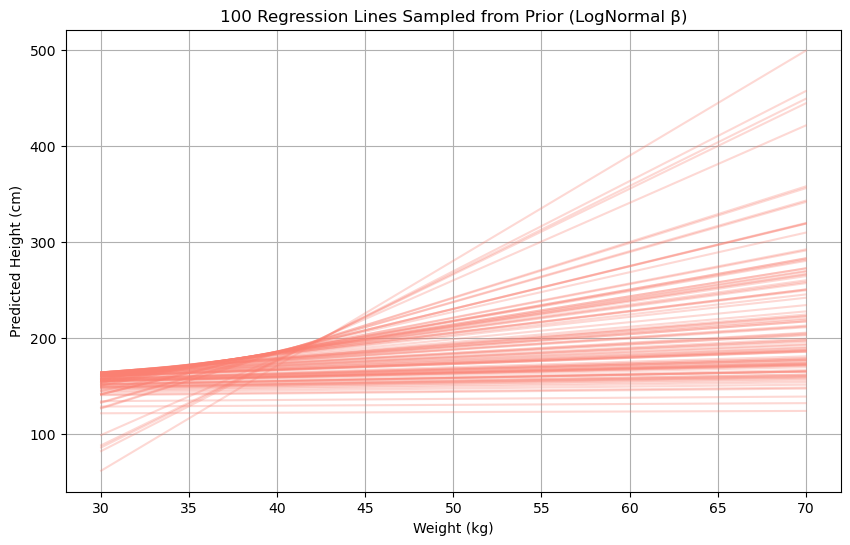

In [14]:
np.random.seed(123)
log_beta_samples = np.random.lognormal(mean=0, sigma=1, size=N)

plt.figure(figsize=(10, 6))

for i in range(N):
    mu_vals = alpha_samples[i] + log_beta_samples[i] * (w_vals - w_bar)
    plt.plot(w_vals, mu_vals, color='salmon', alpha=0.3)

plt.title('100 Regression Lines Sampled from Prior (LogNormal β)')
plt.xlabel('Weight (kg)')
plt.ylabel('Predicted Height (cm)')
plt.grid(True)
plt.show()


### Q2d – Regression Lines from Prior with LogNormal(0, 1) for $\beta$

In this task, we repeat the analysis from Q2b but modify the prior for the slope parameter $\beta$. Instead of a normal prior centered at 0, we now assume:

$$
\beta \sim \text{LogNormal}(0, 1)
$$

This change has a significant effect: it restricts all sampled values of $\beta$ to be strictly **positive**, meaning all regression lines slope upwards. The prior reflects a strong belief that **height increases with weight**, while still allowing for substantial uncertainty in the magnitude of this effect.

The plot above shows 100 regression lines, each defined by a pair $(\alpha, \beta)$ sampled from the priors:
- $\alpha \sim \text{Normal}(178, 20)$
- $\beta \sim \text{LogNormal}(0, 1)$

All lines pass through a common vertical anchor point at the mean adult weight $\bar{w}$, and diverge from there depending on the slope. Compared to Q2b, where regression lines spanned both positive and negative slopes, this plot reflects a strong **asymmetry** in the model’s prior: it encodes a directional belief that height increases with weight, excluding the possibility of a negative relationship. The wide spread in steepness shows that while the model believes height should increase with weight, it remains quite uncertain about **how much** it increases.


**Q2 e (6 marks)**

Which prior do you prefer? Why? Is it OK to look at data distributions generated according to the prior, or is this simlar to p-hacking?

Explain why the choice for the log normal makes such a crucial difference. Explain what we give up, when we adopt a log normal prior for one of the variables.

### Q2e – Prior Preference, Predictive Checks, and LogNormal Implications

#### Which prior do you prefer, and why?

Given the analysis in Q2a, which showed a clear and consistent **positive correlation** between weight and height in the adult population, the **LogNormal(0, 1)** prior for $\beta$ is a justified and appropriate choice in this context.

The LogNormal prior reflects a strong belief that the effect of weight on height is **strictly positive**, while still allowing for considerable uncertainty in the **magnitude** of that effect. Unlike the Normal(0, 10) prior, which treats positive and negative slopes as equally likely, the LogNormal prior aligns better with biological intuition and prior evidence — namely, that heavier individuals tend to be taller.

---

#### Is it OK to simulate data from priors, or is this similar to p-hacking?

Yes, simulating from the prior is not only acceptable — it is considered **good practice in Bayesian analysis**. These **prior predictive checks** help us evaluate what the model implies *before* seeing any data. They expose unrealistic assumptions or overly confident beliefs encoded in the priors, allowing us to refine the model if needed.

This is fundamentally different from **p-hacking**, which involves manipulating analysis post hoc to find “significant” results. Prior predictive checks are done **prior to inference**, to transparently examine and improve model assumptions — not to exploit the data.

---

#### Why does the LogNormal prior make such a crucial difference?

The LogNormal(0, 1) prior fundamentally alters the shape of the prior predictive distribution. By constraining $\beta$ to be strictly **positive**, the model excludes any possibility of a negative slope. As a result:

- All prior-sampled regression lines slope upward
- The model encodes directional confidence in the relationship
- The prior predictive distribution becomes **one-sided**

This can have strong effects, particularly in **data-sparse** settings, where the posterior may still be strongly influenced by the prior. Even if the observed data weakly suggests a flat or slightly negative trend, the posterior under a LogNormal prior would still be biased toward a positive relationship.

---

#### What do we give up by using a LogNormal prior?

By adopting the LogNormal prior, we give up the ability to express **uncertainty about the direction** of the relationship. The model can no longer discover that height might decrease with weight, or that there is **no relationship** at all — because these outcomes are not permitted by the prior.

Technically, while the LogNormal does not allow $\beta = 0$, it does allow very small positive values close to zero. So extremely **flat relationships** are still represented — but true neutrality or negative effects are excluded.

In contexts where we have **good reason** to assume a positive effect (e.g., prior studies, biological theory, or exploratory plots), this restriction can be helpful. However, in cases where we wish to remain agnostic or let the data speak fully, a **symmetric prior like Normal(0, 10)** may be safer.

---

#### Conclusion

In this case, the LogNormal prior is an appropriate and defensible modelling choice. It reflects a reasonable belief that height should increase with weight, based on both domain knowledge and initial exploratory analysis. However, it must be used with care: we gain interpretability and stronger priors at the cost of flexibility and openness to alternative relationships. This trade-off must always be assessed in the context of the modelling goal and the strength of prior belief.


**Negative Log Likelihood**

The expression for the negative log likelihood $\hat{L}$ is:
$$
\hat{L} = \frac{1}{2}\sum^N_{i=1}\frac{\{\alpha + \beta(w_i - \bar{w})-h_i\}^2}{\sigma^2} + \frac{1}{2}\{\frac{\alpha-\alpha_0}{\sigma_{\alpha}}\}^2 +\frac{1}{2} (\ln \beta)^2 + (N/2) \ln(2 \pi \sigma^2)
$$
with
$$
\alpha_0 = 178, \sigma_{\alpha} = 20
$$

Note that this is a function of $\alpha, \beta$ and $\sigma$. It is not hard to define this function in Python. Below, we will show its code and a simple method to find its maximum. **This is not something you are asked to do.**


In [15]:
# This code is provided to help answer the following questions

def quad(weights, heights, alpha, beta, sigma, alpha_0,sigma_alpha):
  ''' Quad is a literal code transcription of the negative log likelihood
  shown above.'''
  N = len(weights)
  weightbar = np.mean(weights)
  mu_term = (alpha+beta*(weights - weightbar) - heights)**2
  alpha_term  = 0.5*((alpha-alpha_0)/sigma_alpha)**2
  beta_term = 0.5*np.log(beta)**2
  return 0.5*mu_term.sum()/(sigma*sigma)+ (N/2.)*np.log(2*np.pi*sigma**2) + \
    alpha_term + beta_term


alpha_0     = 178.
sigma_alpha = 20.

# We find the maximum log likelihood by a method which confusingly is called
# minimize
from scipy.optimize import minimize

# Assuming quad, alpha_0, and sigma_alpha are defined as in the provided code.

def objective_function(params):
    alpha, beta, sigma = params
    return quad(weights, heights, alpha, beta, sigma, alpha_0, sigma_alpha)

# This is a starting guess for our values
initial_guess = [150, 1, 10]
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1055.9926863719152
             x: [ 1.546e+02  9.068e-01  5.109e+00]
           nit: 82
          nfev: 150
 final_simplex: (array([[ 1.546e+02,  9.068e-01,  5.109e+00],
                       [ 1.546e+02,  9.068e-01,  5.109e+00],
                       [ 1.546e+02,  9.068e-01,  5.109e+00],
                       [ 1.546e+02,  9.068e-01,  5.109e+00]]), array([ 1.056e+03,  1.056e+03,  1.056e+03,  1.056e+03]))


We have used a numerical approximation technique to find the *maximum a posteriori*. The values are:
$$
\alpha_{MAP} = 154.6 \\
\beta_{MAP} = 0.907 \\
\sigma_{MAP} = 5.11
$$


**Q2 f (1 mark)**
Based on the values of $\alpha$, $\beta$, answer the following questions?
- Are the !Kung a tall people?
- Do you see evidence of a positive correlation between height and weight?

### Q2f – Interpretation of MAP Estimates

**Are the !Kung a tall people?**  
The MAP estimate for $\alpha$ is approximately **154.6 cm**, representing the expected height of an individual with **average weight** in the adult population. Compared to global averages — which typically range from 165 cm to 175 cm in modern industrialised populations — this suggests that the !Kung are **relatively short** by global standards. However, this height may be entirely typical within their ecological and nutritional context.

**Do you see evidence of a positive correlation between height and weight?**  
Yes — the MAP estimate for $\beta$ is **0.907**, which is clearly positive. This indicates a **strong positive linear relationship** between weight and height: for each additional kilogram above the average weight, the predicted height increases by approximately 0.91 cm. This finding is consistent with biological expectations and visually supports the trend observed in Q2a’s scatterplot.


# Quadratic Approximation

We have already seen that evaluating the posterior distribution is cheap and not difficult, but this is a function in a three dimensional space $(\alpha, \beta, \gamma)$, and to find its maximum we need numerical optimisation techniques.

We would like to be able to give an uncertainty on the parameters we find at this maximum. If the posterior were a Gaussian, we could easily use the covariance matrix to estimate the uncertainty in each parameter. But the posterior is not a Gaussian. A technique that is sometimes applied is to calculate the so-called Hessian matrix, which a matrix of all second order derivatives. We then replace the posterior distribution by a Gaussian, which has the same maximum as the MAP and the same Hessian. This amounts approximating the negative log-likelihood by a quadratic function. And that is a Gaussian. You can show that its covariance matrix is the matrix inverse of the Hessian. We will provide a numerical estimate of the covariance matrix.

In [16]:
!pip install numdifftools

In [17]:
from numdifftools import Hessian

# Assuming 'result.x' contains the optimized parameters [alpha, beta, sigma]
alpha_map, beta_map, sigma_map = result.x

#Define a function to calculate the Hessian at a specific point
def hessian_at_point(params):
    return Hessian(objective_function)(params)

#Calculate the Hessian at the MAP estimate
hessian_map = hessian_at_point([alpha_map, beta_map, sigma_map])


m=hessian_map
cov = np.linalg.inv(m)
print("Covariance Matrix at the MAP:")
print(cov)

Covariance Matrix at the MAP:
[[7.54365942e-02 5.03836015e-09 6.47747417e-05]
 [5.03836015e-09 1.81153440e-03 2.93440488e-06]
 [6.47747417e-05 2.93440488e-06 3.77256313e-02]]


**Q2 g (4 marks)**

This the the covariance matrix of $(\alpha, \beta, \sigma)$., i.e.:
$$
\left(\begin{array}{rrr} \sigma_{\alpha \alpha} & \sigma_{\alpha \beta} & \sigma_{\alpha \sigma} \\ \sigma_{\beta \alpha} & \sigma_{\beta \beta} & \sigma_{\beta \sigma} \\ \sigma_{\sigma \alpha} & \sigma_{\sigma \beta} & \sigma_{\sigma \sigma}\end{array} \right) =
\begin{bmatrix}
7.54365942 \times 10^{-2} & 5.03836015 \times 10^{-9} & 6.47747417 \times 10^{-5} \\
5.03836015 \times 10^{-9} & 1.81153440 \times 10^{-3} & 2.93440488 \times 10^{-6} \\
6.47747417 \times 10^{-5} & 2.93440488 \times 10^{-6} & 3.77256313 \times 10^{-2}
\end{bmatrix}
$$




 Research how marginal distributions for single variables are derived from multivariate Gaussian distributions. Use this to find the MAP estimate of $\beta$ and its standard deviation. Explain whether you believe that the correlation between height and weight is reliably positive, based on this result.

### Q2g – Marginal Distribution for $\beta$ and Interpretation

#### 1. How are marginal distributions derived from a multivariate Gaussian?

If a parameter vector $(\alpha, \beta, \sigma)$ is approximately distributed as a multivariate Gaussian:
$$
(\alpha, \beta, \sigma) \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$
then the marginal distribution of any one variable (e.g., $\beta$) is simply a **univariate normal distribution** with:
- Mean equal to the corresponding value in $\boldsymbol{\mu}$ (i.e., the MAP estimate), and
- Variance equal to the corresponding **diagonal entry** of the covariance matrix $\boldsymbol{\Sigma}$.

So:
$$
\beta \sim \mathcal{N}(\mu_\beta, \sigma^2_{\beta\beta})
$$
This property is a standard result from multivariate Gaussian theory: the marginal of a multivariate normal is itself normal, and the marginal mean and variance are directly extracted from the joint distribution.

---

#### 2. What are the MAP estimate and standard deviation of $\beta$?

From the optimisation result:
- $\beta_{\text{MAP}} = 0.907$ (From Q2f)
- From the covariance matrix, the variance of $\beta$ is:
  $$
  \sigma^2_{\beta\beta} = 1.81153440 \times 10^{-3}
  $$
  So the standard deviation is:
  $$
  \text{std}(\beta) = \sqrt{1.81153440 \times 10^{-3}} \approx 0.0425
  $$

Therefore, the marginal posterior for $\beta$ is:
$$
\beta \sim \mathcal{N}(0.907, 0.0425^2)
$$

---

#### 3. Is the correlation between height and weight reliably positive?

Yes — the posterior distribution for $\beta$ is **entirely positive** and centred well above zero:
- The MAP estimate is 0.907,
- The standard deviation is only 0.0425,
- Even two standard deviations below the mean gives:
  $$
  0.907 - 2 \times 0.0425 = 0.822
  $$
  which is still strongly positive.

This means that nearly all of the posterior probability mass lies in the positive range. So based on this result, we can say with high confidence that there is a **reliably positive correlation** between weight and height in the adult !Kung population.


**This ends the coursework. The section below is for information only: it shows how a predictive distribution can be generated.**

## Predictive Distributions

In the exercise above you have found how you can decide that a given correlation is reliably positive. Here we will show how posterior distributions can be used to generate predictive distributions. We will show two methods.

Assume that we want to find the distribution of $\mu$ for $w=50$. Since we have determined the posterior distribution for $\alpha, \beta, \sigma$, we can sample ($\alpha_i, \beta_i, \sigma_i)$ from the posterior and the
use the relationship:
$$
\mu_i = \alpha_i + \beta_i(50 - \bar{w})
$$
to sample from
$$
\mathcal{N}(\mu_i, \sigma_i)
$$
For a large number of events, this will give us a sample of $h_i$, which we can histogram.

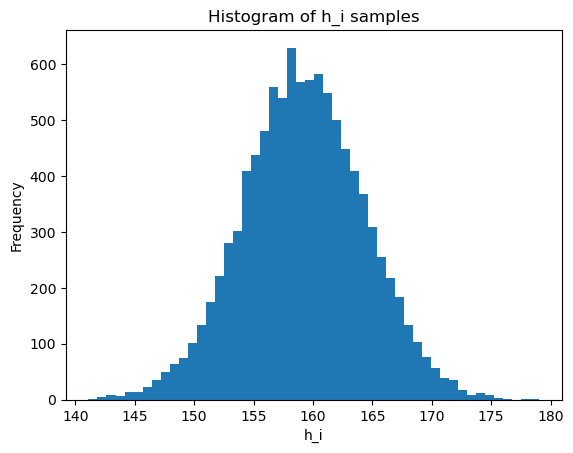

In [18]:
# prompt: Consider the multivariate Gaussian whose mean and covariance we have just calculated. Sample N_{sample} =10000 events. For each event calculate mu_i = \alpha_i + \beta_i(50 - w_mean), where w_mean is the mean of all weights. Then sample from a normal distribution with  mu_i, sigma_i as parameters and call the result h_i. Show a histogram of the resulting h_i samples.
N_sample = 10000
np.random.seed(123)

# Sample alpha, beta, and sigma from a multivariate normal distribution
# Use the MAP estimates as the mean and the covariance matrix calculated earlier
mean = [alpha_map, beta_map, sigma_map]
samples = np.random.multivariate_normal(mean, cov, size=N_sample)
alpha_samples = samples[:, 0]
beta_samples = samples[:, 1]
sigma_samples = samples[:, 2]

# Calculate mu_i for each event
mu_i = alpha_samples + beta_samples * (50 - w_bar)

# Sample h_i from a normal distribution with mu_i and sigma_i
h_i = np.random.normal(mu_i, sigma_samples)

# Plot a histogram of h_i
plt.hist(h_i, bins=50)
plt.xlabel("h_i")
plt.ylabel("Frequency")
plt.title("Histogram of h_i samples")
plt.show()
